## Install the package dependencies before running this notebook

In [1]:
import torch
from torch.utils.data import Dataset, DataLoader
import os, os.path 
import numpy 
import pickle
from glob import glob
import math

"""
    number of trajectories in each city
    # austin --  train: 43041 test: 6325 
    # miami -- train: 55029 test:7971
    # pittsburgh -- train: 43544 test: 6361
    # dearborn -- train: 24465 test: 3671
    # washington-dc -- train: 25744 test: 3829
    # palo-alto -- train:  11993 test:1686

    trajectories sampled at 10HZ rate, input 5 seconds, output 6 seconds
    
"""

'\n    number of trajectories in each city\n    # austin --  train: 43041 test: 6325 \n    # miami -- train: 55029 test:7971\n    # pittsburgh -- train: 43544 test: 6361\n    # dearborn -- train: 24465 test: 3671\n    # washington-dc -- train: 25744 test: 3829\n    # palo-alto -- train:  11993 test:1686\n\n    trajectories sampled at 10HZ rate, input 5 seconds, output 6 seconds\n    \n'

## Create a Torch.Dataset class for the training dataset

In [2]:
from glob import glob
import pickle
import numpy as np
import torch.nn as nn
import torch.nn.functional as F

ROOT_PATH = "./"

cities = ["austin", "miami", "pittsburgh", "dearborn", "washington-dc", "palo-alto"]
splits = ["train", "test"]

def get_city_trajectories(city="palo-alto", split="train", valid=False, normalized=False):
    f_in = ROOT_PATH + split + "/" + city + "_inputs"
    inputs = pickle.load(open(f_in, "rb"))
    inputs = np.asarray(inputs)
    
    outputs = None
    
    if split=="train":
        f_out = ROOT_PATH + split + "/" + city + "_outputs"
        outputs = pickle.load(open(f_out, "rb"))
        outputs = np.asarray(outputs)
        
        if valid:
            idx = int(len(inputs) * .8)
            return inputs[:idx], inputs[idx:], outputs[:idx], outputs[idx:]

    return inputs, outputs

class ArgoverseDataset(Dataset):
    """Dataset class for Argoverse"""
    def __init__(self, city: str, split:str, transform=None):
        super(ArgoverseDataset, self).__init__()
        self.transform = transform
        self.split = split
        self.inputs, self.outputs = get_city_trajectories(city=city, split=split, normalized=False)

    def __len__(self):
        return len(self.inputs)

    def __getitem__(self, idx):
        
        if self.split == 'train':
            data = (self.inputs[idx], self.outputs[idx])
        else:
            data = (self.inputs[idx])
            
        if self.transform:
            data = self.transform(data)

        return data
    
class ValidationDataset(Dataset):
    """Dataset class for Argoverse"""
    def __init__(self, inputs, outputs, transform=None):
        super(ValidationDataset, self).__init__()
        self.transform = transform
        self.inputs, self.outputs = inputs, outputs

    def __len__(self):
        return len(self.inputs)

    def __getitem__(self, idx):
        
        data = (self.inputs[idx], self.outputs[idx])
            
        if self.transform:
            data = self.transform(data)

        return data

# intialize a dataset
city = 'palo-alto' 
split = 'train'
train_dataset  = ArgoverseDataset(city = city, split = split)

## Create a DataLoader class for training

In [3]:
batch_sz = 32  # batch size 
train_loader = DataLoader(train_dataset, batch_size=batch_sz)

## Sample a batch of data and visualize 

In [4]:
import matplotlib.pyplot as plt
# import random

# def show_sample_batch(sample_batch):
#     """visualize the trajectory for a batch of samples"""
#     inp, out = sample_batch
#     batch_sz = inp.size(0)
#     agent_sz = inp.size(1)
    
#     fig, axs = plt.subplots(1, batch_sz, figsize=(15, 3), facecolor='w', edgecolor='k')
#     fig.subplots_adjust(hspace = .5, wspace=.001)
#     axs = axs.ravel()   
#     for i in range(batch_sz):
#         axs[i].xaxis.set_ticks([])
#         axs[i].yaxis.set_ticks([])
        
        # first two feature dimensions are (x,y) positions
#         axs[i].scatter(inp[i,:,0], inp[i,:,1])
#         axs[i].scatter(out[i,:,0], out[i,:,1])

        
# for i_batch, sample_batch in enumerate(train_loader):
#     # inp[i] is a scene with 50 coordinates, input[i, j] is a coordinate
#     # gotta loop through each scene in the batch
#     inp, out = sample_batch # inp: (batch size, 50, 2), out: (batch size, 60, 2)
#     """
#     TODO:
#       implement your Deep learning model
#       implement training routine
#     """
#     show_sample_batch(sample_batch)
#     break

## These models were trained with SGD as the opto and it wasn't very good

In [5]:
# model = RNN(2, 256, 2).to(device)
# opto = torch.optim.SGD(model.parameters(), lr=1)
# loss_fct = nn.MSELoss()
# train(model, 100, train_loader, opto, loss_fct, device)

In [6]:
# model = RNN(2, 128, 2).to(device)
# opto = torch.optim.SGD(model.parameters(), lr=1)
# loss_fct = nn.MSELoss()
# train(model, 100, train_loader, opto, loss_fct, device)

In [7]:
# model = RNN(2, 128, 2).to(device)
# opto = torch.optim.SGD(model.parameters(), lr=.1)
# loss_fct = nn.MSELoss()
# train(model, 100, train_loader, opto, loss_fct, device)

## Started using Adam optimizer / lstm with dropout, these next 2 models are usable, adding l2 loss didnt converge, currently using the second one

In [8]:
# model = RNN(input_size=2, hidden_size=128, output_size=2, num_layers=2, dropout=.2).to(device)
# opto = torch.optim.Adam(model.parameters(), lr=.001)
# loss_fct = nn.MSELoss()

# train(model, 100, train_loader, opto, loss_fct, device)

In [9]:
# model = RNN(input_size=2, hidden_size=256, output_size=2, num_layers=2, dropout=.2).to(device)
# opto = torch.optim.Adam(model.parameters(), lr=.001)
# loss_fct = nn.MSELoss()

# train(model, 100, train_loader, opto, loss_fct, device)

## Bidirectional doesn't make sense here

In [10]:
# model = RNN(2, 256, 2, .2, True).to(device)
# opto = torch.optim.Adam(model.parameters(), lr=.001, weight_decay=.01)
# loss_fct = nn.MSELoss()

# train(model, 100, train_loader, opto, loss_fct, device)

# Test Dataset and Predictions

In [28]:
def generate_submission(fp, model, opto, loss_fct, device, valid=False):
    cities = ["austin", "miami", "pittsburgh", "dearborn", "washington-dc", "palo-alto"] 
    header = ['ID'] + ['v' + str(i) for i in range(0, 120)]
    
    with open(fp, 'w') as f:
        f.write(','.join(header) + '\n')

    for city in cities:
        batch_sz = 256
        if valid:
            i, v_i, o, v_o = get_city_trajectories(city=city, split="train", valid=valid)
            training_data = ValidationDataset(i, o)
            validation_data = ValidationDataset(v_i, v_o)
            train_loader = DataLoader(training_data, batch_size=batch_sz)
            val_loader = DataLoader(validation_data, batch_size=batch_sz)
        else:
            val_loader = None
            training_data = ArgoverseDataset(city=city, split='train')
            train_loader = DataLoader(training_data, batch_size=batch_sz, drop_last=True)
        
        train(model, 100, train_loader, loss_fct, opto, device, val_loader, valid)
        
        if not valid:
            test_dataset  = ArgoverseDataset(city=city, split='test')
            test_loader = DataLoader(test_dataset, batch_size=1)

            write_city_preds(model, test_loader, device, city, fp)

    print(fp + ' generated!')

In [109]:
class StandardScaler():
    """Standardize data by removing the mean and scaling to
    unit variance.  This object can be used as a transform
    in PyTorch data loaders.

    Args:
        mean (FloatTensor): The mean value for each feature in the data.
        scale (FloatTensor): Per-feature relative scaling.
    """

    def __init__(self, mean=None, scale=None):
        if mean is not None:
            mean = torch.FloatTensor(mean)
        if scale is not None:
            scale = torch.FloatTensor(scale)
        self.mean_ = mean
        self.scale_ = scale

    def fit(self, sample):
        """Set the mean and scale values based on the sample data.
        """
        self.mean_ = sample.mean(0, keepdim=True)
        self.scale_ = sample.std(0, unbiased=False, keepdim=True)
        return self

    def __call__(self, sample):
        return (sample - self.mean_)/self.scale_

    def inverse_transform(self, sample):
        """Scale the data back to the original representation
        """
        #print(sample.size())
        #print(self.scale_.size())
        #print(self.mean_)
        return sample * self.scale_ + self.mean_

In [136]:
# from d2l.ai
def grad_clipping(net, theta):
    """Clip the gradient."""
    if isinstance(net, nn.Module):
        params = [p for p in net.parameters() if p.requires_grad]
    else:
        params = net.params
    norm = torch.sqrt(sum(torch.sum((p.grad ** 2)) for p in params))
    if norm > theta:
        for param in params:
            param.grad[:] *= theta / norm


class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, device, num_layers=2, dropout=0, bidirectional=False):
        super(RNN, self).__init__()
        self.device = device
        self.num_layers = 1
        self.hidden_size = hidden_size
        self.rnn = nn.LSTM(input_size=input_size, hidden_size=hidden_size, num_layers=1, dropout=dropout, bidirectional=False, batch_first=True)
        if bidirectional:
            self.fc = nn.Linear(2 * hidden_size, output_size)
        else:
            #self.act1 = nn.ReLU(inplace = True)
            self.fc = nn.Linear(hidden_size, output_size)
            
        #self.act1 = nn.ReLU(inplace = True)
        #self.bn1 = nn.BatchNorm1d(60)
        
        #self.estimator = nn.Linear(60, 2)

            
        #self.batch_normalisation1 = nn.BatchNorm1d(hidden_size)


    def forward(self, x, h, c):
        #x = x.to(self.device)
        
        x = F.layer_norm(x, x.size())
        #x = self.batch_normalisation1(x)
        # 32, 50, 2
        # 32, 1, 2
        for i in range(50):
            #print(i)
            #print(h[0])
            out, (h,c) = self.rnn(x[:,i,:].unsqueeze(1), (h.detach(),c.detach()))
        
        #out_all = torch.tensor(())
        #out_all = out_all.to(self.device)
        out_all = []
        for i in range(60):
            
            v, (h,c) = self.rnn(x[:,-1:,:], (h.detach(),c.detach()))
            #print(h.shape)
            #print(h.size())
            #out = self.act1(h)
            out = self.fc(h)
#             print('hi')
            #print(out.size())
            #outputs.append(out)
            
            out_all.append(out)
        out_all = torch.cat(out_all, dim = 0)
            #out_all = torch.cat((out_all, out))
        
        #print(out_all.size())
        #out_all.reshape(32,-1,2)
        #out=out_all.transpose(0,1)
#         out = self.act1(self.bn1(out))
#         out = self.estimator(out)
            
        return out_all.transpose(0,1), (h.detach(),c.detach())#_all.reshape(-1, 60, 2), (h, c) #.reshape(-1, 60, 2)
        
#         out, _ = self.rnn(x)
        
#         out = self.fc(out)

#         return out



            
        #print(out_all.reshape(32,-1,2).size())
#         print(torch.cat(outputs, dim=1))
#out_all = out_all.to(self.device)
        #print(out.size())
        #out = self.fc(out)
       
    
    def init_hidden(self, batch_size=512):
        hidden = torch.zeros(self.num_layers, batch_size, self.hidden_size).to(device)
        cell = torch.zeros(self.num_layers, batch_size, self.hidden_size).to(device)
        return hidden, cell

      
        #out, _ = self.rnn(x)
        
        #out = self.fc(out)

        #return out

import seaborn as sns
def train(net, n_epochs, train_loader, loss_fct, criterion, device, val_loader=None, valid=False):
    train_l= []
    val_l = []
    scaler = torch.cuda.amp.GradScaler()
    for epoch in range(n_epochs):
        ## training loop
        hidden, cell = net.init_hidden(256)
        t0 = time.time()
        for i_batch, batch in enumerate(train_loader):
            #print(len([x[0,0] for x, y in train_loader]))
            #print(len([x[0,0] for x, y in train_loader]))
            #criterion.zero_grad(set_to_none=True)
            for param in model.parameters():
                param.grad = None
            # inp[i] is a scene with 50 coordinates, input[i, j] is a coordinate
            inp, out = batch
            inp = inp.float().to(device)
            out = out.float().to(device)
            
                        
            foo = StandardScaler()
            foo.fit(inp)
            #print(inp)
            #print(foo(inp))
#             print(foo.fit(inp))
#             print(StandardScaler())
            
            # 0 pad the end of input seq
            #inp = torch.cat((inp, torch.zeros(inp.size(0), 10, inp.size(2), device=device)), dim=1)
            
            #print(inp.size())
    
            #inp = torch.cat((inp, torch.zeros(inp.size(0), 10, inp.size(2), device=device)), dim=1)
            #pred = net(inp).to(device)
            #.to(device)
            with torch.cuda.amp.autocast():
                pred, (h,c) = net(foo(inp), hidden, cell)
            # print('input: {}'.format(inp[0, :3]))
            # print('preds: {}'.format(pred[0, :3]))
            # print('true: {}'.format(out[0, :3]))
#             print('*****************************')      
#             print(pred.size())
#             #print(pred)
#             print('*****************************')
#             print(out.size())
            #print(out)
                #print(pred)
                #inp2 = inp
                #inp2 = torch.cat((inp, torch.zeros(inp2.size(inp2.mean(0, keepdim=True)), 10, inp.size(2), device=device)), dim=1)
                foo2 = StandardScaler()
                foo2.fit(out)
                #print(pred.size())
                #print(pred[:, None, None].size())
                
                loss = loss_fct(foo2.inverse_transform(pred), out)
            
            scaler.scale(loss).backward()
            scaler.unscale_(criterion)
            grad_clipping(net, 1)
            #torch.nn.utils.clip_grad_norm_(model.parameters(),max_norm=0.1, norm_type="inf")
            #torch.nn.utils.clip_grad_norm(model.parameters(), args.clip)
            #torch.nn.utils.clip_grad_norm_(net.parameters(), 1)
            scaler.step(criterion)
            scaler.update()

            #print(loss.item())
#             print(len(batch))
            #print(i_batch)

#             criterion.zero_grad()
#             #grad_clipping(net, 1)
#             loss.backward()
#             grad_clipping(net, 1)
#             criterion.step()
        #print('bi')
        print('{} seconds'.format(time.time() - t0))
            
        train_l.append(loss.item())
        
        if valid:
            for i_batch, batch in enumerate(val_loader):
                with torch.no_grad():
                    inp, out = batch
                    inp = inp.float().to(device)
                    out = out.float().to(device)

                    inp = torch.cat((inp, torch.zeros(inp.size(0), 10, inp.size(2), device=device)), dim=1)
                    pred = net(inp).to(device)

                    val_loss = loss_fct(pred, out)
        if valid:
            val_l.append(val_loss.item())
            
            print('epoch: {}, training loss: {}, validation loss: {}'.format(epoch + 1, loss, val_loss))
        else:
            print('epoch: {}, training loss: {}'.format(epoch + 1, loss))
        
    
    fig, ax = plt.subplots(1, 2, figsize=(15, 10))
    sns.lineplot(ax=ax[0], x=np.arange(0, len(train_l)), y=train_l)
    if valid:
        sns.lineplot(ax=ax[1], x=np.arange(0, len(val_l)), y=val_l)
    print('-'* 70)
    return

# def predict(net, data_loader, device):
#     with torch.no_grad():
#         for i_batch, batch in enumerate(data_loader):
#             inp, _ = batch
#             inp = torch.cat((inp.float().to(device), torch.zeros(inp.size(0), 10, inp.size(2)).to(device)), dim=1)
                        
#             preds = net(inp.float().to(device))
            
#             return preds
        
def write_city_preds(net, test_loader, device, city, fp):       
    scene = 0
    output = ''

    with torch.no_grad():
        for i_batch, batch in enumerate(test_loader):
            inp = batch
            inp = inp.float().to(device)
            inp = torch.cat((inp, torch.zeros(inp.size(0), 10, inp.size(2), device=device)), dim=1)

            preds = net(inp)
            flat = preds[0].flatten().cpu().tolist()
            
            row = ['{}_{}'.format(scene, city)] + flat
            row = [str(i) for i in row]
            output += ','.join(row) + '\n'
            
            scene += 1
    
    try:
        with open('./submission.csv', 'a') as f:
            f.write(output)
        print('Predictions for {} generated!'.format(city))
        return 1
    except:
        print('Error! Unsuccessful write...')
        return -1
            
            
            
            

16.32648730278015 seconds
epoch: 1, training loss: 3702.25
15.746092319488525 seconds
epoch: 2, training loss: 1378.131103515625
16.25423502922058 seconds
epoch: 3, training loss: 2374.871826171875
16.40245747566223 seconds
epoch: 4, training loss: 1887.901123046875
16.075568199157715 seconds
epoch: 5, training loss: 2378.00634765625
16.621626138687134 seconds
epoch: 6, training loss: 1406.84716796875
16.64114022254944 seconds
epoch: 7, training loss: 3722.336669921875
16.395253658294678 seconds
epoch: 8, training loss: 1300.8133544921875
16.23365354537964 seconds
epoch: 9, training loss: 1019.3419799804688
16.38461184501648 seconds
epoch: 10, training loss: 3263.212158203125
16.231130838394165 seconds
epoch: 11, training loss: 813.7646484375
16.51542353630066 seconds
epoch: 12, training loss: 755.7780151367188
16.840901374816895 seconds
epoch: 13, training loss: 1025.8909912109375
16.623230934143066 seconds
epoch: 14, training loss: 611.5321655273438
16.34329652786255 seconds
epoch: 1

TypeError: forward() missing 2 required positional arguments: 'h' and 'c'

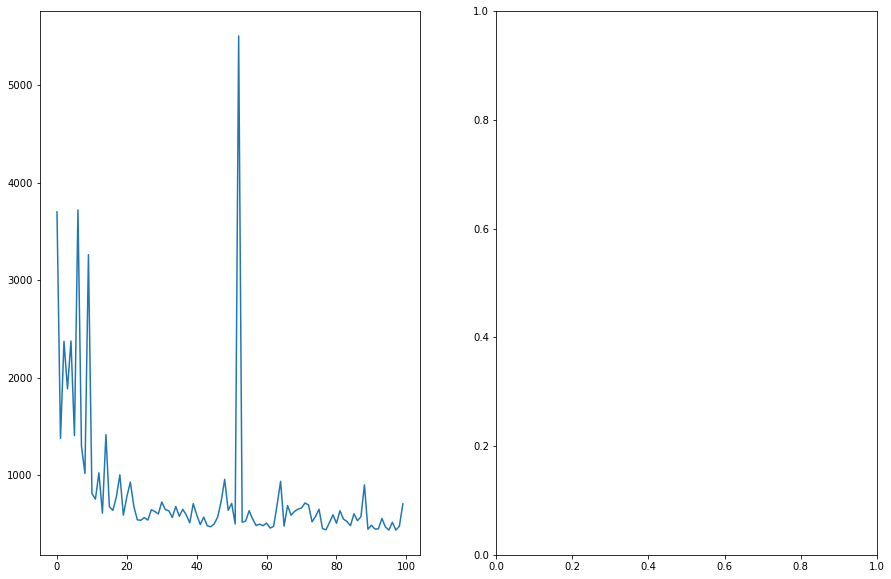

In [137]:
import time
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = RNN(input_size=2, hidden_size=512, output_size=2, device=device, num_layers=1).to(device)
opto = torch.optim.AdamW(model.parameters(), lr=.001)
loss_fct = nn.MSELoss()

generate_submission('./submission.csv', model, opto, loss_fct, device, valid=False)

In [135]:
import time
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = RNN(input_size=2, hidden_size=512, output_size=2, device=device, num_layers=1).to(device)
opto = torch.optim.AdamW(model.parameters(), lr=.001)
loss_fct = nn.MSELoss()

generate_submission('./submission.csv', model, opto, loss_fct, device, valid=False)

15.276566743850708 seconds
epoch: 1, training loss: 1408212.0
15.866853475570679 seconds
epoch: 2, training loss: 889669.75
16.89917755126953 seconds
epoch: 3, training loss: 322283.6875
16.006129264831543 seconds
epoch: 4, training loss: 158296.78125
16.661400079727173 seconds
epoch: 5, training loss: 201401.046875
17.04783844947815 seconds
epoch: 6, training loss: 259916.875
16.996500968933105 seconds
epoch: 7, training loss: 128386.7734375
17.318639039993286 seconds
epoch: 8, training loss: 159494.640625
17.103318691253662 seconds
epoch: 9, training loss: 163016.921875
16.82403016090393 seconds
epoch: 10, training loss: 83911.0234375
16.656020641326904 seconds
epoch: 11, training loss: 77797.2265625
16.882617950439453 seconds
epoch: 12, training loss: 30321.623046875
17.082923412322998 seconds
epoch: 13, training loss: 28491.13671875
16.89716362953186 seconds
epoch: 14, training loss: 62194.9609375
16.662810564041138 seconds
epoch: 15, training loss: 17840.326171875
18.1192700862884

KeyboardInterrupt: 

In [ ]:
len([x[0,0] for x, y in train_loader])

In [15]:
torch.backends.cudnn.benchmark = True

In [17]:
@torch.jit.script
def fused_gelu(x):
    return x * 0.5 * (1.0 + torch.erf(x / 1.41421))